In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from scipy.optimize import curve_fit

In [3]:
def lorenzt_derivate(x,a,b,c,x0):
    return((2*a*(x-x0))/(b**2+(x-x0)**2)**2+c)

In [4]:
def lorentz(x,a,b,c,x0):
    return(-a/(b**2+(x-x0)**2)+c*x)

In [5]:
def lorentz_nl(x,a,b,x0):
    return(-a/(b**2+(x-x0)**2))

In [6]:
def filt_dataset(data,low_lim,up_lim):
    filt_data=[]
    for i in range (data.shape[0]):
        if data[i,0]>low_lim and data[i,0]<up_lim:
            filt_data.append(data[i])
    filt_data=array(filt_data)
    return filt_data

(3348, 3368)

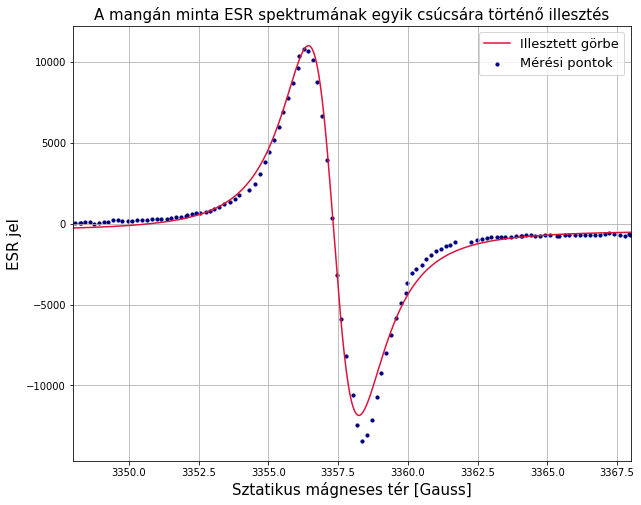

In [7]:
figsize(10,8)
data=loadtxt('./mn3.txt',comments='#')
data_n=filt_dataset(data,3348,3368)
popt, pcov = curve_fit(lorenzt_derivate,data_n[:,0],data_n[:,2],p0=[-88000,1.3,-100,3357])
scatter(data[:,0],data[:,2],s=10,color='navy',label='Mérési pontok')
plot(linspace(3348,3368,1000),lorenzt_derivate(linspace(3348,3368,1000),*popt),color='crimson',label='Illesztett görbe')
grid(True)
xlabel('Sztatikus mágneses tér [Gauss]',fontsize=15)
ylabel('ESR jel',fontsize=15)
legend(fontsize=13)
title('A mangán minta ESR spektrumának egyik csúcsára történő illesztés',fontsize=15)
xlim(3348,3368)
#savefig('./mang_reszl.pdf',bbox_inches='tight')

In [8]:
popt

array([-6.74947015e+04,  1.56526948e+00, -4.17467920e+02,  3.35734411e+03])

In [9]:
sqrt(diag(pcov))

array([2.17932985e+03, 1.92312765e-02, 4.56035910e+01, 9.46258434e-03])

Text(0.5,1,'A teljes mangán ESR spektrum')

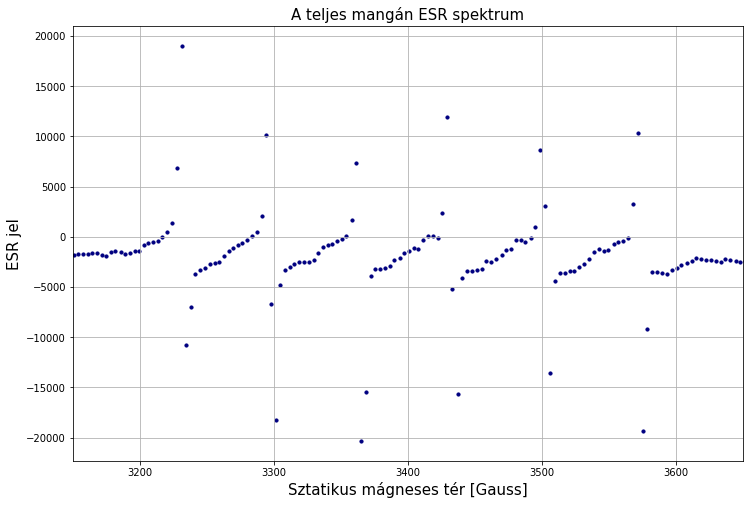

In [10]:
figsize(12,8)
data=loadtxt('./mn_scan2.txt',comments='#')
scatter(data[:,0],data[:,2],s=10,color='navy')
grid(True)
xlabel('Sztatikus mágneses tér [Gauss]',fontsize=15)
ylabel('ESR jel',fontsize=15)
xlim(3150,3650)
#ylim(-13000,11000)
title('A teljes mangán ESR spektrum',fontsize=15)
#savefig('./mang_teljes.pdf',bbox_inches='tight')

In [11]:
popt

array([-6.74947015e+04,  1.56526948e+00, -4.17467920e+02,  3.35734411e+03])

In [12]:
data=loadtxt('./mn_scan2.txt',comments='#')
def fit_peaks(data,low_lim,up_lim,peak_pos,s_popt):
    figsize(12,8)
    a=s_popt[0]
    b=s_popt[1]
    c=s_popt[2]
    data_n=filt_dataset(data,low_lim,up_lim)
    popt, pcov = curve_fit(lambda x,x_0: lorenzt_derivate(x,a,b,c,x_0),data_n[:,0],data_n[:,2]/5,p0=[peak_pos])
    scatter(data[:,0],data[:,2]/5,s=10,color='navy',label='Mérési pontok')
    plot(linspace(low_lim,up_lim,1000),lorenzt_derivate(linspace(low_lim,up_lim,1000),a,b,c,popt),color='crimson',label='Illesztett görbe')
    xlim(low_lim,up_lim)
    grid(True)
    print(popt,sqrt(pcov))
    #xlabel('Sztatikus mágneses tér [Gauss]',fontsize=15)
    #ylabel('ESR jel',fontsize=15)

In [14]:
s_popt=popt

[3231.19194971] [[0.01480153]]


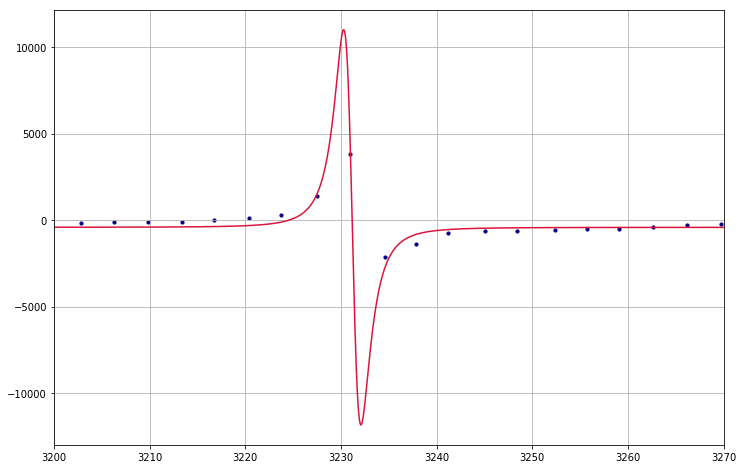

In [15]:
fit_peaks(data,3200,3270,3231,s_popt)

[3297.71128634] [[0.01583421]]


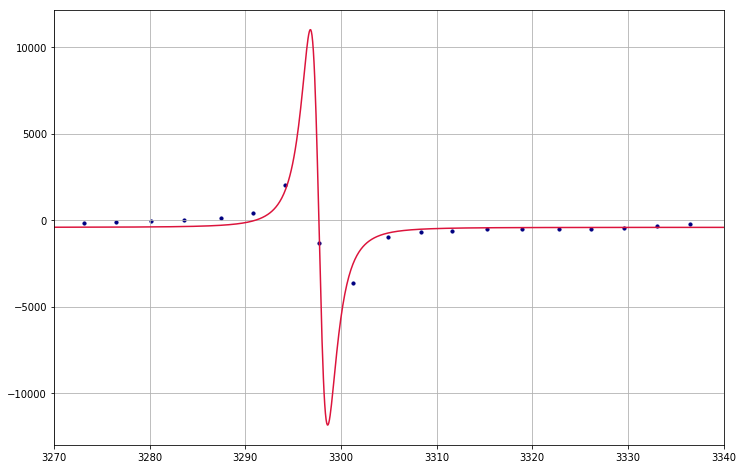

In [16]:
fit_peaks(data,3270,3340,3298,s_popt)

[3231.19195146] [[0.01844371]]
[3297.71128783] [[0.01924951]]
[3364.78939735] [[0.01963478]]
[3433.07203094] [[0.02346182]]
[3502.67526891] [[0.01440081]]
[3575.18119187] [[0.01727493]]


Text(0.5,0,'Sztatikus mágneses tér [Gauss]')

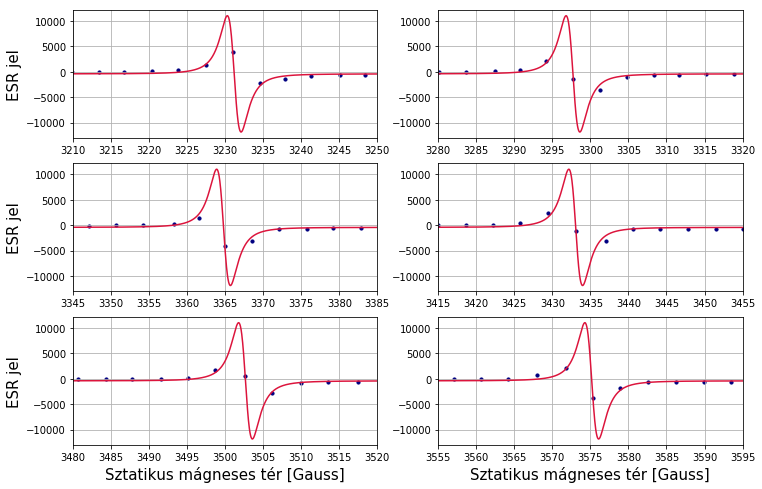

In [17]:
subplot(3,2,1)
fit_peaks(data,3210,3250,3231,s_popt)
ylabel('ESR jel',fontsize=15)
subplot(3,2,2)
fit_peaks(data,3280,3320,3298,s_popt)
subplot(3,2,3)
fit_peaks(data,3345,3385,3365,s_popt)
ylabel('ESR jel',fontsize=15)
subplot(3,2,4)
fit_peaks(data,3415,3455,3433,s_popt)
subplot(3,2,5)
fit_peaks(data,3480,3520,3507,s_popt)
xlabel('Sztatikus mágneses tér [Gauss]',fontsize=15)
ylabel('ESR jel',fontsize=15)
subplot(3,2,6)
fit_peaks(data,3555,3595,3575,s_popt)
xlabel('Sztatikus mágneses tér [Gauss]',fontsize=15)
#savefig('./mang_teljes_fits.pdf',bbox_inches='tight')

$h\nu = g\mu_BB_0+Am_I$ 

$B_0(m_I)=\frac{1}{g\mu_B}(h\nu-Am_I)$

In [18]:
def linear(mI,a,b):
    return(b-a*mI)

In [19]:
B0=(3231.19195146,3297.71128783,3364.78939735,3433.07203094,3502.67526891,3575.18119187)
mi=linspace(-5/2,5/2,6)

In [20]:
popt, pcov = curve_fit(linear,mi,B0[::-1])

In [21]:
popt

array([  68.6605937 , 3400.77018806])

In [22]:
sqrt(diag(pcov))

array([0.53366213, 0.91140157])

In [46]:
6.62e-34*95.389e9/(9.274e-24)/3.4

2.002674079336285

In [48]:
sqrt((0.005/95.389)**2+(0.911e-3/3.4)**2)*2.002674079336285

0.0005467704065240554

In [54]:
2.002674079336285*9.274e-24*68.6605937e-4

1.2752194342827754e-25

In [56]:
sqrt((0.0005467704065240554/2.002674079336285)**2+(0.53366213/68.6605937)**2)*1.2752194342827754e-25

9.917712655349373e-28

Text(0.5,1,'A mangán spektrumából származó értékek illesztése')

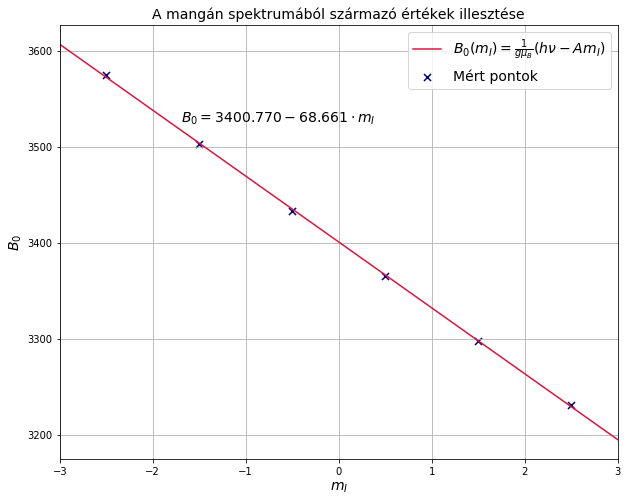

In [24]:
figsize(10,8)
scatter(mi,B0[::-1],marker='x',color='navy',s=50,label='Mért pontok')
plot(array([-3,3]),linear(array([-3,3]),*popt),color='crimson',label=r'$B_0(m_I)=\frac{1}{g\mu_B}(h\nu-Am_I)$')
xlabel(r'$m_I$',fontsize=14)
ylabel(r'$B_0$',fontsize=14)
xlim(-3,3)
grid(True)
legend(fontsize=14)
text(-1.7,3525,r'$B_0=3400.770-68.661\cdot m_I$',fontsize=14)
title('A mangán spektrumából származó értékek illesztése',fontsize=14)
#savefig('mn_hf_fit.pdf',bbox_inches='tight')

In [25]:
popt

array([  68.6605937 , 3400.77018806])

Text(0.5,0,'Sztatikus mágneses tér [Gauss]')

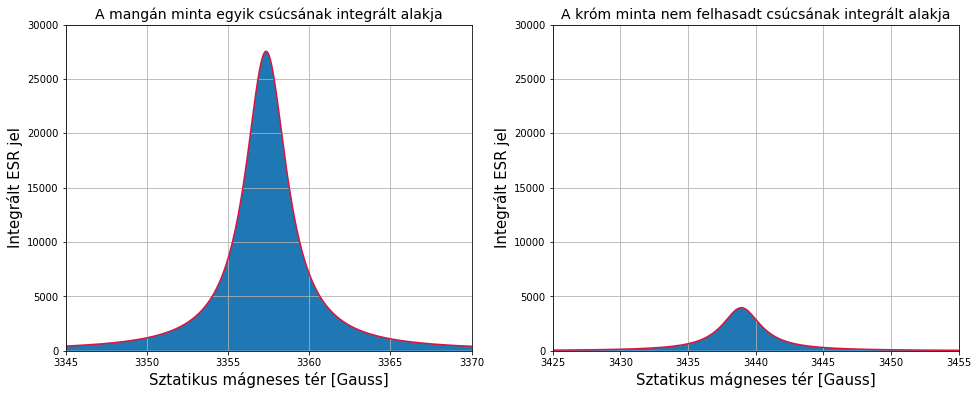

In [32]:
figsize(16,6)
fig = plt.figure()
data=loadtxt('./mn3.txt',comments='#')
data_n=filt_dataset(data,3348,3368)
popt, pcov = curve_fit(lorenzt_derivate,data_n[:,0],data_n[:,2],p0=[-88000,1.3,-100,3357])
ax = fig.add_subplot(1, 2, 1)
title('A mangán minta egyik csúcsának integrált alakja',fontsize=14)
plot(linspace(3340,3376,1000),lorentz(linspace(3340,3376,1000),*popt)-popt[2]*linspace(3340,3376,1000)\
     ,color='crimson',label='Illesztett görbe')
fill_between(linspace(3340,3376,1000),lorentz(linspace(3340,3376,1000),*popt)-popt[2]*linspace(3340,3376,1000))
grid(True)
xlim(3345,3370)
ylim(1,30000)
ylabel('Integrált ESR jel', fontsize=15)
xlabel('Sztatikus mágneses tér [Gauss]',fontsize=15)

ax = fig.add_subplot(1, 2, 2)
title('A króm minta nem felhasadt csúcsának integrált alakja',fontsize=14)
popt, pcov = curve_fit(lorenzt_derivate,data_cr_n[:,0],data_cr_n[:,1]/10,p0=[-88000,1.3,-100,3440])
plot(linspace(3420,3460,1000),lorentz(linspace(3420,3460,1000),*popt)-popt[2]*linspace(3420,3460,1000)\
     ,color='crimson',label='Illesztett görbe')
fill_between(linspace(3420,3460,1000),lorentz(linspace(3420,3460,1000),*popt)-popt[2]*linspace(3420,3460,1000))
grid(True)
xlim(3425,3455)
ylim(1,30000)
ylabel('Integrált ESR jel', fontsize=15)
xlabel('Sztatikus mágneses tér [Gauss]',fontsize=15)

#savefig('./int_alakok.pdf',bbox_inches='tight')

In [27]:
from scipy.integrate import quad

In [67]:
popt, pcov = curve_fit(lorenzt_derivate,data_n[:,0],data_n[:,2],p0=[-88000,1.3,-100,3357])
a=quad(lorentz_nl,3345,3370,args=(popt[0],popt[1],popt[3]))

In [66]:
popt, pcov = curve_fit(lorenzt_derivate,data_cr_n[:,0],data_cr_n[:,1]/10,p0=[-88000,1.3,-100,3440])
b=quad(lorentz_nl,3425,3455,args=(popt[0],popt[1],popt[3]))

In [76]:
a[0]/b[0]*6*8.3e13/1e15*0.023

0.07083305514810073

In [71]:
sqrt((a[1]/a[0])**2+(b[1]/b[0])**2)*6.184132630356272

1.4312225737956346e-08

In [28]:
import scipy.interpolate

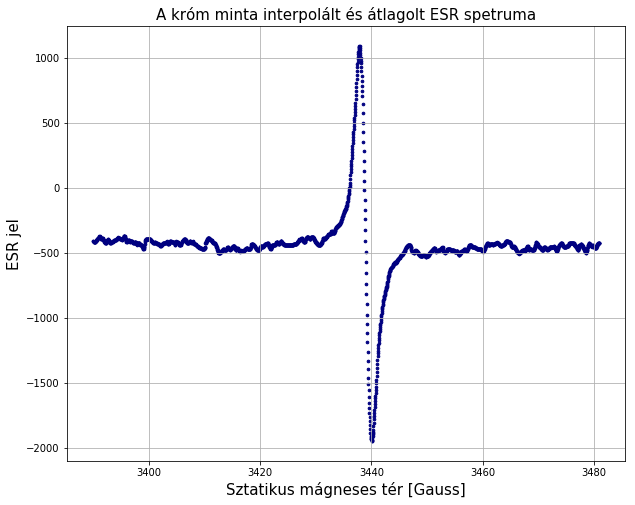

In [36]:
figsize(10,8)

mes_points=linspace(3410.15,3481,2000)

def resample_spec(orig_wl, orig_fl, new_wl):
    new_fl = scipy.interpolate.interp1d(orig_wl, orig_fl)(new_wl)
    return new_fl

data1=loadtxt('./cr1.txt',comments='#')
new_val1=resample_spec(data1[:,0],data1[:,2],mes_points)
data2=loadtxt('./cr2.txt',comments='#')
new_val2=resample_spec(data2[:,0],data2[:,2],mes_points)
data3=loadtxt('./cr3.txt',comments='#')
new_val3=resample_spec(data3[:,0],data3[:,2],mes_points)

avg_values=(new_val1+new_val2+new_val3)/3

mes_points2=linspace(3390,3410.15,500)
data2=loadtxt('./cr2.txt',comments='#')
new_val2_1=resample_spec(data2[:,0],data2[:,2],mes_points2)
data3=loadtxt('./cr3.txt',comments='#')
new_val3_1=resample_spec(data3[:,0],data3[:,2],mes_points2)

avg_values2=(new_val2_1+new_val3_1)/2

scatter(mes_points,avg_values/10,color='navy',s=7)
scatter(mes_points2,avg_values2/10,color='navy',s=7)
grid(True)


title('A króm minta interpolált és átlagolt ESR spetruma',fontsize=15)
xlabel('Sztatikus mágneses tér [Gauss]',fontsize=15)
ylabel('ESR jel',fontsize=15)
savefig('./crom_avg_spec.pdf',bbox_inches='tight')
savetxt('./cr_avg.dat',vstack((mes_points,avg_values)).T,fmt='%10e')

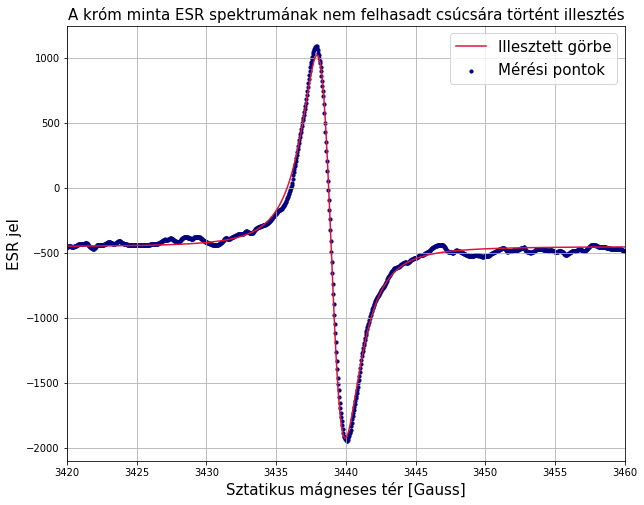

In [38]:
figsize(10,8)
cr_dat=vstack((mes_points,avg_values)).T
data_cr_n=filt_dataset(cr_dat,3420,3460)
popt, pcov = curve_fit(lorenzt_derivate,data_cr_n[:,0],data_cr_n[:,1]/10,p0=[-88000,1.3,-100,3440])
scatter(data_cr_n[:,0],data_cr_n[:,1]/10,s=10,color='navy',label='Mérési pontok')
plot(linspace(3420,3460,1000),lorenzt_derivate(linspace(3420,3460,1000),*popt),color='crimson',label='Illesztett görbe')
xlim(3420,3460)
grid(True)
legend(fontsize=15)
xlabel('Sztatikus mágneses tér [Gauss]',fontsize=15)
ylabel('ESR jel',fontsize=15)
title('A króm minta ESR spektrumának nem felhasadt csúcsára történt illesztés',fontsize=15)
savefig('./cr_peak_fit.pdf',bbox_inches='tight')

In [39]:
popt

array([-1.21319572e+04,  1.74945440e+00, -4.52519746e+02,  3.43894823e+03])

In [44]:
(1.98*9.274e-24*3.43894823)/(6.62e-34)/1e9

95.38935899144954

In [45]:
sqrt((0.0001/1.98)**2+(2.29050454e-03/3.43894823e+03)**2)*95389358991.44954/1e9

0.00481806330982901

In [40]:
sqrt(diag(pcov))

array([8.40543822e+01, 4.58120999e-03, 9.52133291e-01, 2.29050454e-03])

In [58]:
cr_peaks=[3411.89,3430.01,3447.03,3465.66]
cr_mi=[-3/2,-1/2,1/2,3/2]

In [59]:
popt2, pcov2 = curve_fit(linear,cr_mi,cr_peaks[::-1])

In [60]:
popt2

array([  17.83299991, 3438.6475    ])

In [63]:
sqrt(diag(pcov2))

array([0.20790143, 0.23244085])

Text(0.5,1,'A króm spektrumából származó értékek illesztése')

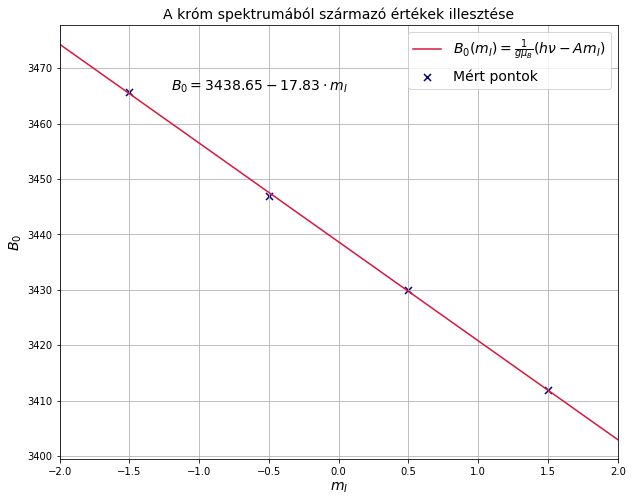

In [61]:
figsize(10,8)
scatter(cr_mi,cr_peaks[::-1],marker='x',color='navy',s=50,label='Mért pontok')
plot(array([-2,2]),linear(array([-2,2]),*popt2),color='crimson',label=r'$B_0(m_I)=\frac{1}{g\mu_B}(h\nu-Am_I)$')
xlabel(r'$m_I$',fontsize=14)
ylabel(r'$B_0$',fontsize=14)
xlim(-2,2)
grid(True)
legend(fontsize=14)
text(-1.2,3466,r'$B_0=3438.65-17.83\cdot m_I$',fontsize=14)
title('A króm spektrumából származó értékek illesztése',fontsize=14)
#savefig('./cr_fl_fit.pdf',bbox_inches='tight')

In [64]:
17.83299991e-4*1.98*9.274e-24

3.2745881750737323e-26